In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

Analisis Archivos Homicidios

In [2]:
df_homicidios_victimas = pd.read_csv("datasets/homicidios_victimas.csv",sep=";")
df_homicidios_hechos = pd.read_csv("datasets/homicidios_hechos.csv",sep=";")

In [3]:
df_homicidios_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


In [4]:
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

¿Qué casos son los que suelen tener más victimas?

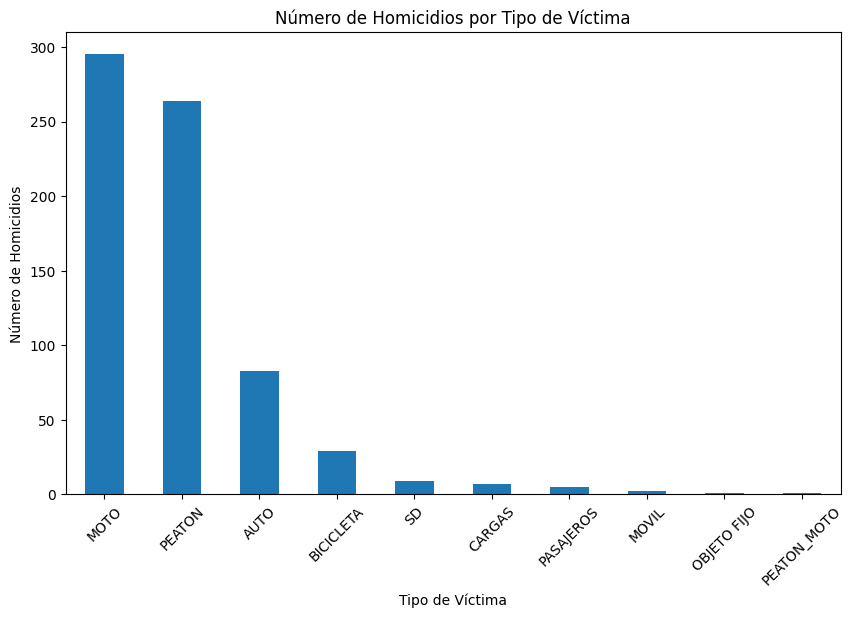

In [10]:
conteos_victimas = df_homicidios_hechos['VICTIMA'].value_counts()

plt.figure(figsize=(10,6))
conteos_victimas.plot(kind='bar')
plt.title('Número de Homicidios por Tipo de Víctima')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad si es necesario
plt.show()

¿En qué lugares suceden más accidentes?

In [12]:
df_homicidios_hechos['LUGAR_DEL_HECHO'].value_counts()

LUGAR_DEL_HECHO
AV 27 DE FEBRERO Y AV ESCALADA              4
CASTILLO, RAMON S., PRES. AV. Y CALLE 12    2
PAZ, GRAL. AV. Y DEL LIBERTADOR AV.         2
AV LA PLATA Y CNEL GREGORIO POMAR           2
CANTILO, INT. Y UDAONDO, GUILLERMO AV.      2
                                           ..
AV. ALVEAR Y AV. DEL LIBERTADOR             1
AV. PAVON Y TREINTA Y TRES ORIENTALES       1
COLECTORA AV. GRAL. PAZ 5750                1
VIEYTES Y CRUZ                              1
PADRE CARLOS MUJICA 709                     1
Name: count, Length: 683, dtype: int64

¿A qué horas pasan más accidentes?

In [14]:
df_homicidios_hechos['HORA'].value_counts()

HORA
16:00:00    10
21:00:00    10
09:00:00    10
12:30:00    10
14:00:00    10
            ..
10:12:00     1
00:10:00     1
05:10:00     1
16:10:00     1
00:43:00     1
Name: count, Length: 323, dtype: int64

Homicidios victimas

In [5]:
df_homicidios_victimas.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


In [6]:
df_homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


outliers

In [24]:
z_score = np.abs(stats.zscore(df_homicidios_hechos['N_VICTIMAS']))
threshold = 5
outliers_victimas = df_homicidios_hechos[z_score > threshold]
outliers_victimas['N_VICTIMAS']

29     2
97     2
161    2
170    3
171    2
180    2
230    2
234    2
244    2
267    2
289    2
300    2
312    2
359    2
372    2
402    2
427    2
558    2
583    2
596    2
Name: N_VICTIMAS, dtype: int64

Text(0.5, 0, 'Número de victimas')

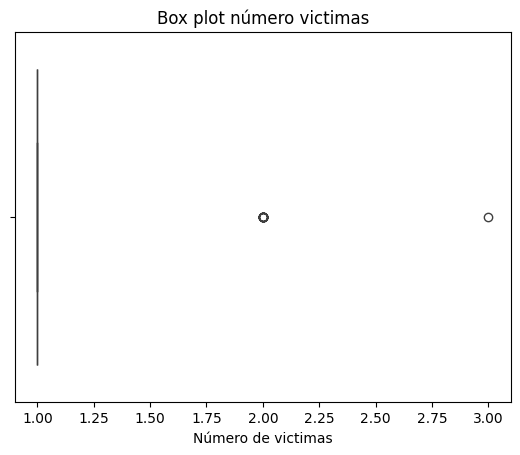

In [14]:
g = sns.boxplot(data=df_homicidios_hechos,x='N_VICTIMAS')
g.set_title("Box plot número victimas")
g.set_xlabel("Número de victimas")

Text(0.5, 0, 'Horas')

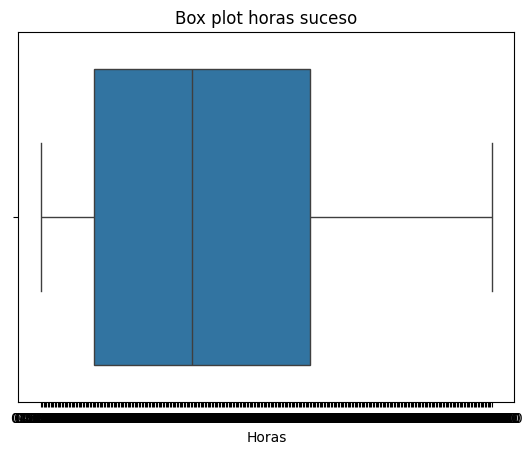

In [8]:
h = sns.boxplot(data=df_homicidios_hechos,x='HORA')
h.set_title("Box plot horas suceso")
h.set_xlabel("Horas")

Analisis arhivos Lesiones

In [3]:
df_lesiones_victimas = pd.read_csv("datasets/lesiones_victimas.csv",sep=";")
df_lesiones_hechos = pd.read_csv("datasets/lesiones_hechos.csv",sep=";")

In [12]:
df_lesiones_hechos.describe()

,n_victimas,aaaa,mm,dd,altura
count,23785.000000,23785.000000,23785.000000,23785.000000,12771.000000
mean,1.160563,2019.901324,6.597561,15.616355,729.076345
std,0.551571,0.859432,3.476955,8.700047,1734.515099
min,0.000000,2019.000000,1.000000,1.000000,0.000000
25%,1.000000,2019.000000,3.000000,8.000000,0.000000
50%,1.000000,2020.000000,7.000000,16.000000,0.000000
75%,1.000000,2021.000000,10.000000,23.000000,270.000000
max,16.000000,2021.000000,12.000000,31.000000,17700.000000


In [13]:
df_lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [14]:
df_lesiones_victimas.describe()

,AAA,MM,DD
count,27605.000000,27605.000000,27605.000000
mean,2019.897265,6.618113,15.620721
std,0.860899,3.479295,8.684067
min,2019.000000,1.000000,1.000000
25%,2019.000000,3.000000,8.000000
50%,2020.000000,7.000000,16.000000
75%,2021.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


In [15]:
df_lesiones_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID hecho          27605 non-null  object
 1   AAA               27605 non-null  int64 
 2   MM                27605 non-null  int64 
 3   DD                27605 non-null  int64 
 4   FECHA             27605 non-null  object
 5   VEHICULO_VICTIMA  27605 non-null  object
 6   SEXO              27605 non-null  object
 7   EDAD_VICTIMA      27605 non-null  object
 8   GRAVEDAD          27605 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.9+ MB


Text(0.5, 0, 'Número de victimas')

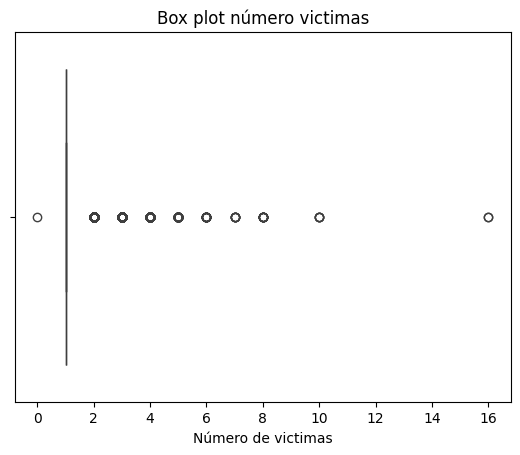

In [17]:
g = sns.boxplot(data=df_lesiones_hechos,x='n_victimas')
g.set_title("Box plot número victimas")
g.set_xlabel("Número de victimas")

Text(0.5, 0, 'Horas')

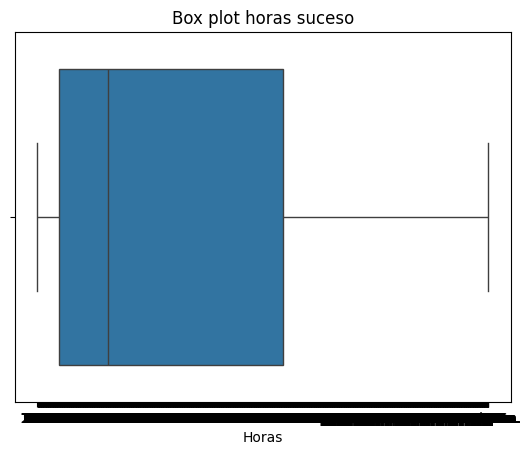

In [18]:
h = sns.boxplot(data=df_lesiones_hechos,x='hora')
h.set_title("Box plot horas suceso")
h.set_xlabel("Horas")

In [22]:
z_score = np.abs(stats.zscore(df_lesiones_hechos['n_victimas']))
threshold = 5
outliers_victimas = df_lesiones_hechos[z_score > threshold]
outliers_victimas['n_victimas']

4        4
20       5
149      4
184      4
258      5
        ..
23523    4
23559    4
23602    5
23702    6
23773    5
Name: n_victimas, Length: 227, dtype: int64

¿Qué casos son los que sulene tener más victimas?

In [5]:
df_lesiones_hechos['victima'].value_counts()

victima
SD                    10733
MOTO                   5461
CICLISTA               2209
AUTO                   2033
PEATON                 2026
TRANSPORTE PUBLICO      678
CAMIONETA               189
TAXI                    182
MOVIL                   100
CAMION                   79
MIXTO                    42
MONOPATIN                28
OTRO                     13
UTILITARIO               12
Name: count, dtype: int64

¿A qué horas pasan más accidentes?

In [7]:
df_lesiones_hechos['hora'].value_counts()

hora
0:00             359
16:00            286
18:00            277
12:00            270
17:00            265
                ... 
05:09:00 p.m.      1
22:12              1
09:36:00 p.m.      1
04:40:00 a.m.      1
6:38               1
Name: count, Length: 2000, dtype: int64

¿En qué lugares suceden más accidentes?

In [9]:
df_lesiones_hechos['altura'].value_counts()

altura
0.0       9318
1800.0      23
2343.0      19
1200.0      16
700.0       16
          ... 
2617.0       1
142.0        1
280.0        1
127.0        1
276.0        1
Name: count, Length: 2176, dtype: int64